In this project, we use a preprocessed data of CPE to create a regression model for candidate 25. The task is to predict the student score depending on the course unit.

Data preprocessing done with EXcel
Mdel Building
Model selection selection
Make prediction of a new score by grade

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #for splitting dataset
%matplotlib inline

In [8]:
#download data to colab notebook
!gdown  https://drive.google.com/uc?id=19a7SgprOimUy1tMxQgUpgmkM91HElBs6 

Downloading...
From: https://drive.google.com/uc?id=19a7SgprOimUy1tMxQgUpgmkM91HElBs6
To: /content/studentdata.csv
100% 1.64k/1.64k [00:00<00:00, 1.64MB/s]


In [11]:
#reading the dataset
sd = pd.read_csv('/content/studentdata.csv')


In [12]:
#checking the dataset
sd.head()

,Courses,Course Unit,Student1 score,Student1 grade,Student2 score,Student2 grade
0,CHE 101 (3),3,66,12,70,15
1,CHE 103 (1),1,67,4,63,4
2,CVE 105 (2),2,65,8,70,10
3,GNS 101 (2),2,55,6,70,10
4,GNS 103 (1),1,78,5,70,5


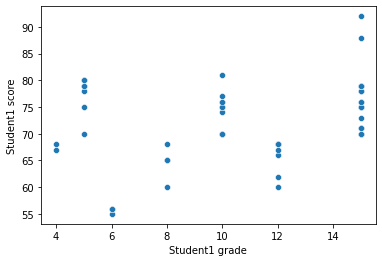

In [13]:
#exploring the relationship between the data
sns.scatterplot(data=sd, x='Student1 grade', y='Student1 score')

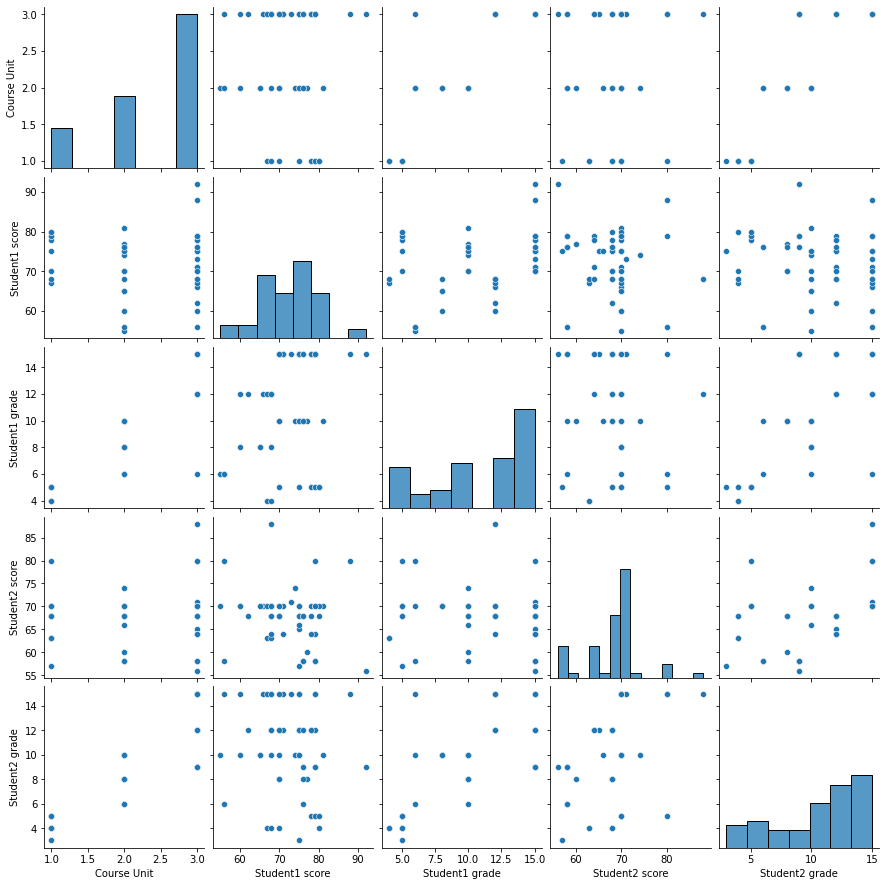

In [34]:
#pair plot of the data
sns.pairplot(data=sd)

In [14]:
#defining data to be trained and tested
x= sd[['Student1 grade']]
y= sd[['Student1 score']]

In [16]:
#splitting of data intro train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



In [17]:
#explore
x_train.head()

,Student1 grade
30,12
41,10
33,15
42,12
48,15


In [18]:
#importing Linear Regression Model
from sklearn.linear_model import LinearRegression

In [21]:
#creating instance of the model
lm = LinearRegression()

In [22]:
#training the data
lm.fit(x_train, y_train)

LinearRegression()

In [23]:
lm.coef_

array([[0.6298057]])

In [24]:
#creating dataframe to represent the correlation
coeff_df = pd.DataFrame(lm.coef_, index = x.columns, columns =['Coeff'])

In [25]:
coeff_df
#keeping every other feature fixed, if the student do a new course, he will get the below score % 

,Coeff
Student1 grade,0.629806


In [26]:
#using the test data to predict
prediction =lm.predict(x_test)

In [27]:
#various prediction values
prediction

array([[71.28028111],
       [74.42930963],
       [68.76105829],
       [74.42930963],
       [67.50144688],
       [70.0206697 ],
       [72.53989252],
       [68.13125258],
       [71.28028111],
       [72.53989252],
       [68.13125258],
       [74.42930963]])

In [32]:
#assuming a student take a 2 unit unit course and get 65 percent(4 point) which
#equals 12 point grade
grd= [[12]]
new_pred = lm.predict(grd)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
#predicted score to be obtained by student
print(new_pred)

[[72.53989252]]
